<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
df_raw = pd.read_csv('/content/drive/MyDrive/유방암.csv', encoding = 'euc-kr')

print(df_raw.shape)
df_raw.head()

(320, 31)


,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [5]:
df_raw = pd.get_dummies(df_raw, columns=['diagnosis'], drop_first=True)

print(df_raw.shape)
df_raw.head()

(320, 31)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_음성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,1
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,0
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,1
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,0
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,0


In [6]:
df_raw_x = df_raw.drop("diagnosis_음성",axis = 1)
df_raw_y = df_raw["diagnosis_음성"]


df_raw_y.head()

0    1
1    0
2    1
3    0
4    0
Name: diagnosis_음성, dtype: uint8

In [ ]:
# 산점도 행렬
sns.pairplot(df_raw_x)

In [7]:
# Pearson 상관계수 : pearson, kendall, spearman
df_raw_x.corr().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
mean_radius,1.000,0.329,0.997,0.988,0.148,0.454,0.675,0.811,0.140,-0.307,...,0.959,0.272,0.955,0.931,0.071,0.297,0.470,0.697,0.076,-0.059
mean_texture,0.329,1.000,0.336,0.317,0.002,0.253,0.309,0.297,0.050,-0.051,...,0.362,0.901,0.370,0.343,0.130,0.299,0.332,0.312,0.095,0.152
mean_perimeter,0.997,0.336,1.000,0.986,0.191,0.513,0.721,0.844,0.184,-0.249,...,0.958,0.279,0.960,0.930,0.106,0.346,0.513,0.728,0.105,-0.011
mean_area,0.988,0.317,0.986,1.000,0.146,0.436,0.672,0.802,0.124,-0.294,...,0.949,0.250,0.946,0.946,0.061,0.268,0.444,0.665,0.042,-0.076
mean_smoothness,0.148,0.002,0.191,0.146,1.000,0.678,0.592,0.578,0.584,0.643,...,0.186,0.069,0.220,0.169,0.800,0.504,0.503,0.535,0.380,0.531
mean_compactness,0.454,0.253,0.513,0.436,0.678,1.000,0.890,0.812,0.670,0.625,...,0.479,0.264,0.546,0.441,0.569,0.851,0.826,0.802,0.511,0.681
mean_concavity,0.675,0.309,0.721,0.672,0.592,0.890,1.000,0.935,0.544,0.360,...,0.670,0.292,0.721,0.644,0.473,0.708,0.854,0.848,0.373,0.465
mean_concave_points,0.811,0.297,0.844,0.802,0.578,0.812,0.935,1.000,0.498,0.197,...,0.806,0.283,0.839,0.774,0.436,0.597,0.731,0.891,0.329,0.321
mean_symmetry,0.140,0.050,0.184,0.124,0.584,0.670,0.544,0.498,1.000,0.540,...,0.170,0.101,0.216,0.141,0.445,0.541,0.493,0.486,0.722,0.488
mean_fractal_dimension,-0.307,-0.051,-0.249,-0.294,0.643,0.625,0.360,0.197,0.540,1.000,...,-0.249,0.006,-0.190,-0.246,0.553,0.554,0.411,0.236,0.407,0.782


In [8]:
# 요약 통계량 -> Scale 변환 필요 확인
df_raw_x.describe().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,15.710,20.323,103.050,807.736,0.099,0.123,0.122,0.067,0.187,0.063,...,18.542,27.226,123.222,1133.463,0.138,0.309,0.353,0.145,0.305,0.087
std,3.746,4.151,25.836,391.969,0.014,0.057,0.085,0.042,0.027,0.007,...,5.182,6.050,35.960,640.980,0.023,0.175,0.214,0.067,0.069,0.020
min,7.691,9.710,47.920,170.400,0.053,0.027,0.000,0.000,0.127,0.050,...,8.678,12.020,54.490,223.600,0.086,0.050,0.000,0.000,0.156,0.055
25%,13.050,17.460,84.845,523.900,0.090,0.081,0.053,0.030,0.167,0.057,...,14.657,23.275,95.525,653.525,0.123,0.180,0.183,0.091,0.259,0.073
50%,15.125,20.215,100.100,713.050,0.099,0.115,0.111,0.065,0.185,0.061,...,17.730,26.880,118.850,969.200,0.138,0.277,0.340,0.153,0.296,0.083
75%,18.520,22.500,121.550,1075.250,0.108,0.156,0.170,0.092,0.203,0.067,...,22.420,30.938,148.850,1538.500,0.151,0.406,0.484,0.197,0.328,0.098
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.170,0.291,0.664,0.208


In [9]:
# 변수 이름 저장
x_cols = df_raw_x.columns

# Scale 변환:ndarray 형식
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

# 변환된 데이터 및 형태 확인
print("Scaled Data :\n {}".format(nd_scaled[:5].round(3)))
print("Shape :\n {}".format(nd_scaled.shape))

Scaled Data :
 [[-0.158 -0.879 -0.166 -0.233 -0.745 -0.479 -0.551 -0.628 -0.997 -0.393
  -0.693 -1.741 -0.65  -0.516 -0.499 -0.513 -0.671 -0.865 -0.592 -0.457
  -0.149 -1.156 -0.154 -0.225  0.491  0.139 -0.094 -0.302  0.526  0.511]
 [-1.313 -2.561 -1.329 -1.15  -0.24  -1.154 -1.143 -1.2   -1.774  0.184
  -0.995 -1.649 -1.003 -0.784  0.325 -1.023 -1.067 -1.361 -0.892 -0.801
  -1.342 -2.517 -1.38  -1.124  0.254 -1.046 -1.159 -1.48  -1.388 -0.507]
 [ 0.695 -0.421  0.603  0.596 -0.947 -0.675 -0.478 -0.212 -0.899 -1.174
  -0.734 -1.505 -0.715 -0.471 -1.419 -1.058 -0.936 -1.127 -1.099 -1.269
   0.535 -0.143  0.445  0.432 -0.613 -0.367  0.004  0.173  0.224 -0.887]
 [-0.211 -1.301 -0.256 -0.309 -1.292 -0.661 -0.788 -0.834 -0.659 -0.834
  -0.774 -1.593 -0.712 -0.572 -1.276 -0.594 -0.557 -0.841 -1.011 -0.684
  -0.263 -1.491 -0.313 -0.354 -1.339 -0.169 -0.177 -0.458 -0.524 -0.221]
 [-0.754 -1.738 -0.82  -0.746 -2.095 -1.505 -1.175 -1.326 -1.934 -0.957
  -1.055 -1.518 -1.008 -0.763 -0.761 -0.826 -

In [10]:
# DataFrame으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.158,-0.879,-0.166,-0.233,-0.745,-0.479,-0.551,-0.628,-0.997,-0.393,...,-0.149,-1.156,-0.154,-0.225,0.491,0.139,-0.094,-0.302,0.526,0.511
1,-1.313,-2.561,-1.329,-1.150,-0.240,-1.154,-1.143,-1.200,-1.774,0.184,...,-1.342,-2.517,-1.380,-1.124,0.254,-1.046,-1.159,-1.480,-1.388,-0.507
2,0.695,-0.421,0.603,0.596,-0.947,-0.675,-0.478,-0.212,-0.899,-1.174,...,0.535,-0.143,0.445,0.432,-0.613,-0.367,0.004,0.173,0.224,-0.887
3,-0.211,-1.301,-0.256,-0.309,-1.292,-0.661,-0.788,-0.834,-0.659,-0.834,...,-0.263,-1.491,-0.313,-0.354,-1.339,-0.169,-0.177,-0.458,-0.524,-0.221
4,-0.754,-1.738,-0.820,-0.746,-2.095,-1.505,-1.175,-1.326,-1.934,-0.957,...,-0.951,-1.935,-0.998,-0.870,-1.784,-1.109,-1.094,-1.367,-1.071,-0.898


In [11]:
# 주성분 분석:주성분1(Prin1)~주성분6(Prin6) 생성 및 저장
pca = PCA(n_components=30)
nd_pca = pca.fit_transform(df_scaled)

# 생성된 주성분 점수 확인
print("PCA Data :\n {}".format(nd_pca[:5]))

# 생성된 주성분 점수 shape 확인
print("Shape :\n {}".format(nd_pca.shape))

PCA Data :
 [[-2.00389702e+00 -2.58058106e-01 -1.84890296e+00 -1.31467512e+00
   6.24726217e-01  7.89451676e-01  1.32108678e-01 -1.01407999e+00
   4.97472568e-01 -5.11154359e-01 -1.59476526e-01 -3.85870988e-04
  -1.78211309e-02 -6.72126362e-02  1.47199795e-01 -7.13592324e-02
  -1.35801647e-01  1.60993793e-01 -4.78160362e-01 -2.37147886e-01
   2.44216713e-01  1.64854061e-01  6.63767950e-02  1.80669748e-01
  -1.14558313e-03  8.63622562e-03 -6.86072623e-02  6.04830294e-04
   2.58020639e-02  1.41585915e-02]
 [-5.84906746e+00  2.11647637e-01 -1.68087360e-01 -2.95641861e+00
   1.83054388e+00 -4.05165090e-01  3.23010727e-01 -5.26610206e-01
   4.11091221e-01  1.33667857e-01 -6.39117982e-01 -1.75471721e-01
  -2.09690997e-01 -9.71313041e-02 -2.06895790e-01  1.35980861e-01
  -1.49034285e-01  9.55093848e-02 -1.27211295e-01 -1.48419478e-01
   1.08089523e-01  1.68014456e-01 -6.48893521e-02 -4.34769760e-02
   1.49143900e-02 -4.33905539e-02 -4.97770561e-02  1.20852801e-02
   1.49415519e-02  3.80181172

In [12]:
# 주성분 점수 저장(Prin1~Prin6, DataFrame형식) 및 확인
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6", "Prin7", "Prin8", "Prin9", "Prin10",
                                         "Prin11","Prin12","Prin13","Prin14","Prin15","Prin16", "Prin17", "Prin18", "Prin19", "Prin20",
                                         "Prin21","Prin22","Prin23","Prin24","Prin25","Prin26", "Prin27", "Prin28", "Prin29", "Prin30"])

# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,0.244217,0.164854,0.066377,0.180670,-0.001146,0.008636,-0.068607,0.000605,0.025802,0.014159
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,0.108090,0.168014,-0.064889,-0.043477,0.014914,-0.043391,-0.049777,0.012085,0.014942,0.003802
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,-0.034971,-0.296615,-0.089094,-0.111252,-0.078950,-0.050892,0.067030,0.030987,0.012601,-0.003082
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.009942,-0.103717,0.066354,0.105339,-0.013316,-0.011097,-0.021080,0.033756,-0.021498,0.005064
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,0.072100,0.129423,-0.003367,0.020147,-0.045760,0.052844,-0.065091,0.017130,0.021292,-0.001706


In [13]:
# 주성분 분석 통계량 저장:주성분 번호, Eigenvalue, Eigenvalue ratio 

df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range(1,31)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,13.125,0.436,0.436
1,2,5.982,0.199,0.635
2,3,3.116,0.104,0.738
3,4,1.950,0.065,0.803
4,5,1.319,0.044,0.847
5,6,1.252,0.042,0.889
6,7,0.749,0.025,0.914
7,8,0.534,0.018,0.931
8,9,0.376,0.012,0.944
9,10,0.321,0.011,0.954


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

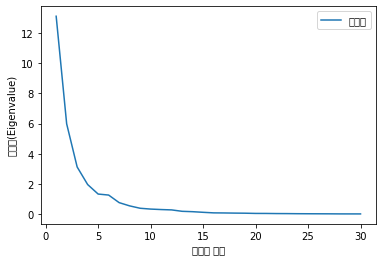

In [14]:
# Scree Plot
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"],label="고유값")

# 그래프 label, legend 설정
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

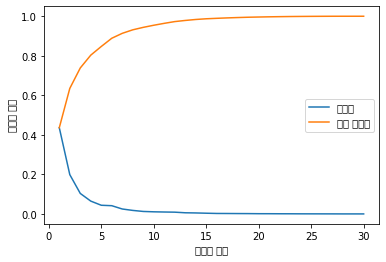

In [15]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"],label="고유값")

# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"],label="누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

In [16]:
# 주성분 분석 데이터의 변수 이름
x_col = pd.DataFrame({"Feature":df_raw_x.columns})

df_eigenvector = pd.concat([pd.Series(x_cols),
                            pd.DataFrame(pca.components_.T * -1,
                            columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6", "Prin7", "Prin8", "Prin9", "Prin10",\
                                       "Prin11","Prin12","Prin13","Prin14","Prin15","Prin16", "Prin17", "Prin18", "Prin19", "Prin20",\
                                       "Prin21","Prin22","Prin23","Prin24","Prin25","Prin26", "Prin27", "Prin28", "Prin29", "Prin30"])], axis=1)
df_eigenvector.round(3)

,0,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,mean_radius,-0.214,0.238,0.026,0.026,-0.007,-0.068,0.156,-0.097,-0.196,...,0.166,0.074,-0.078,0.131,0.070,-0.082,0.168,-0.180,-0.218,0.706
1,mean_texture,-0.110,0.046,0.038,-0.604,0.042,0.101,-0.030,0.138,0.097,...,-0.251,0.109,-0.136,-0.183,-0.070,-0.017,0.040,-0.002,0.006,0.002
2,mean_perimeter,-0.225,0.218,0.024,0.029,-0.010,-0.068,0.147,-0.106,-0.182,...,0.113,0.072,-0.027,0.048,0.095,-0.072,0.168,-0.087,-0.376,-0.689
3,mean_area,-0.213,0.245,-0.002,0.040,-0.010,-0.035,0.082,-0.048,-0.229,...,-0.032,-0.035,0.137,0.060,-0.114,0.142,-0.543,0.259,0.438,-0.042
4,mean_smoothness,-0.151,-0.194,0.058,0.201,-0.037,0.474,0.074,-0.196,-0.012,...,0.076,0.107,0.058,-0.064,0.008,-0.057,-0.069,-0.009,0.003,-0.007
5,mean_compactness,-0.240,-0.163,0.046,0.053,-0.024,-0.040,-0.025,-0.136,0.011,...,-0.184,0.053,-0.350,-0.201,0.202,0.266,-0.169,0.008,0.050,0.051
6,mean_concavity,-0.261,-0.046,0.003,0.046,-0.060,-0.019,0.107,-0.057,0.024,...,-0.259,-0.314,0.112,0.046,0.039,-0.637,-0.129,-0.056,0.011,0.021
7,mean_concave_points,-0.260,0.039,0.035,0.086,-0.008,0.067,0.154,-0.191,-0.009,...,0.092,-0.325,0.099,0.065,-0.168,0.527,0.291,0.029,0.004,0.003
8,mean_symmetry,-0.147,-0.197,0.047,0.138,0.428,0.061,0.054,-0.219,0.176,...,0.100,-0.003,0.064,0.021,-0.024,-0.026,0.008,-0.007,0.009,-0.001
9,mean_fractal_dimension,-0.076,-0.351,-0.000,0.080,-0.056,0.104,-0.290,-0.176,-0.104,...,0.116,0.181,0.092,0.247,-0.011,-0.079,0.125,0.008,-0.008,-0.003


In [ ]:
# 산점도 행렬
sns.pairplot(df_pca)

In [17]:
# 상관계수
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
Prin1,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
Prin2,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
Prin3,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
Prin4,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
Prin5,-0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
Prin6,-0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,0.0,...,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
Prin7,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
Prin8,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
Prin9,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,1.0,0.0,...,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
Prin10,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0


In [18]:
# 다중선형 회귀분석 : 원천 데이터 활용
# 원천 데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)

# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)

# 회귀모델 적합
reg_model = reg_model.fit()

# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:           diagnosis_음성   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     28.79
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           1.12e-69
Time:                        14:34:57   Log-Likelihood:                 6.9483
No. Observations:                 320   AIC:                             48.10
Df Residuals:                     289   BIC:                             164.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# * 참조: Scale 변환 데이터를 이용한 회귀분석
# 다중선형 회귀분석 : Scale 변환 데이터 활용
# Scale 변환 데이터에 절편(const) 컬럼 추가
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y,df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

In [19]:
# 다중선형 주성분 회귀분석
# Eigenvalue, Scree plot 기준으로 적정 주성분 선택
x_var = ["Prin1", "Prin2", "Prin3"]

# 선택된 주성분 점수 데이터에 절편(const) 컬럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_pca_const)

# 회귀모델 적합
reg_model = reg_model.fit()

# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:           diagnosis_음성   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     160.3
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           3.69e-63
Time:                        14:35:34   Log-Likelihood:                -66.382
No. Observations:                 320   AIC:                             140.8
Df Residuals:                     316   BIC:                             155.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6625      0.017     39.553      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
